* ID Nomor identifikasi atau kode yang ditetapkan untuk setiap daftar mobil di dataset. Ini adalah pengidentifikasi unik yang membedakan satu daftar dari yang lain.
* Price Harga mobil bekas yang tertera untuk dijual. Ini mewakili harga permintaan yang ditetapkan oleh penjual.
* Year Tahun pembuatan atau produksi kendaraan. Ini menunjukkan usia mobil.
* Manufacturer Merek atau produsen mobil tersebut, seperti Toyota, Honda, Ford, dll.
* Model Model atau varian mobil tertentu, seperti Camry, Civic, Mustang, dll.
* Condition Menggambarkan kondisi mobil, yang dapat berkisar dari baru hingga sangat baik, bagus, wajar, atau bekas. Ini memberikan indikasi keadaan kendaraan secara keseluruhan.
* Cylinders Jumlah silinder pada mesin mobil. Ini menunjukkan konfigurasi mesin dan mempengaruhi performa kendaraan.
* Fuel Jenis bahan bakar yang digunakan mobil, seperti bensin, solar, elektrik, hybrid, atau bahan bakar alternatif lainnya.
* Odometer Catatan jarak tempuh atau jarak yang ditempuh oleh kendaraan. Ini memberikan indikasi penggunaan mobil dan dapat mempengaruhi nilainya.
* Title Status Mengacu pada status kepemilikan mobil atau dokumen kepemilikan, seperti clean, salvage, rebuilt, atau lien. Ini memberikan informasi tentang status hukum kendaraan.
* Transmission Menentukan jenis sistem transmisi pada mobil, seperti manual, otomatis, atau continuous variable transmission (CVT).
* Drive Menunjukkan konfigurasi drivetrain kendaraan, seperti penggerak roda depan (FWD), penggerak roda belakang (RWD), penggerak semua roda (AWD), atau penggerak empat roda (4WD).
* Size Menggambarkan ukuran atau kelas mobil, seperti compact, mid-size, full-size, SUV, truck, dll.
* Type Mengacu pada tipe bodi atau gaya mobil, seperti sedan, coupe, hatchback, SUV, truk, convertible, dll.
* Paint Color Menentukan warna eksterior mobil, seperti hitam, putih, merah, biru, dll.
* State Menunjukkan negara bagian atau lokasi tempat mobil terdaftar untuk dijual.
* Latitude (Lat) dan Longitude (Long) Koordinat geografis lokasi tempat mobil terdaftar. Ini memungkinkan untuk pemetaan dan analisis geospasial.
* Posting Date Tanggal dan waktu ketika listing mobil telah diposting atau tersedia untuk dijual.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max_columns",9999)
pd.set_option("display.max_rows",9999)

from scipy import stats
from scipy.stats import kstest, jarque_bera, skew
from scipy.special import boxcox1p
from scipy.special import boxcox
from scipy.stats import boxcox_normmax

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
!pip install catboost
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor

from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, OneHotEncoder
# from google.colab import drive
# drive.mount('/content/drive')
# traindata = pd.read_csv('/content/drive/MyDrive/Competition & Project/Kaggle-UsedCar_Predicting/train.csv')
# testdata = pd.read_csv('/content/drive/MyDrive/Competition & Project/Kaggle-UsedCar_Predicting/test.csv')
traindata = pd.read_csv('https://raw.githubusercontent.com/AlrezaAmror/Used-Car-Price/main/train.csv')
testdata = pd.read_csv('https://raw.githubusercontent.com/AlrezaAmror/Used-Car-Price/main/test.csv')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.9 MB/s eta 0:00:00


# First Look

In [2]:
traindata.head()

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,price
0,121610,7309831550,2007.0,infiniti,m45,excellent,NaN,gas,214740.0,clean,automatic,rwd,NaN,sedan,black,ga,34.139588,-83.971135,2021-04-20T11:46:13-0400,7995
1,395646,7317007429,2008.0,cadillac,escalade,NaN,NaN,gas,170276.0,clean,automatic,NaN,NaN,SUV,black,wa,47.756950,-122.212230,2021-05-04T16:16:32-0700,14999
2,236366,7309202024,2003.0,lexus,es,NaN,NaN,gas,176910.0,clean,automatic,fwd,NaN,sedan,NaN,nc,34.209703,-77.843995,2021-04-19T10:07:58-0400,5995
3,66001,7306341714,2017.0,bmw,320i,excellent,NaN,gas,41000.0,clean,automatic,4wd,NaN,SUV,NaN,ca,33.811000,-117.849300,2021-04-13T13:05:06-0700,0
4,320855,7307880118,2008.0,toyota,rav4,good,6 cylinders,gas,138900.0,clean,automatic,4wd,full-size,SUV,silver,pa,40.143550,-76.597071,2021-04-16T15:22:02-0400,7995


In [3]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290129 entries, 0 to 290128
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    290129 non-null  int64  
 1   id            290129 non-null  int64  
 2   year          290129 non-null  float64
 3   manufacturer  278787 non-null  object 
 4   model         290129 non-null  object 
 5   condition     174025 non-null  object 
 6   cylinders     170829 non-null  object 
 7   fuel          288676 non-null  object 
 8   odometer      290129 non-null  float64
 9   title_status  285063 non-null  object 
 10  transmission  290129 non-null  object 
 11  drive         202042 non-null  object 
 12  size          82445 non-null   object 
 13  type          227533 non-null  object 
 14  paint_color   203016 non-null  object 
 15  state         290129 non-null  object 
 16  lat           285726 non-null  float64
 17  long          285726 non-null  float64
 18  post

In [4]:
traindata.describe(include=[int,float])

,Unnamed: 0,id,year,odometer,lat,long,price
count,290129.000000,2.901290e+05,290129.000000,2.901290e+05,285726.000000,285726.000000,2.901290e+05
mean,207301.718108,7.311503e+09,2011.359082,9.764241e+04,38.505649,-94.616042,5.193300e+04
std,119595.649164,4.378450e+06,9.149422,2.058970e+05,5.830007,18.319158,9.591680e+06
min,0.000000,7.301583e+09,1900.000000,0.000000e+00,-84.122245,-159.827728,0.000000e+00
25%,103622.000000,7.308154e+09,2008.000000,3.800000e+04,34.600000,-111.924900,5.991000e+03
50%,207440.000000,7.312664e+09,2014.000000,8.561500e+04,39.170000,-88.212494,1.399000e+04
75%,310804.000000,7.315255e+09,2017.000000,1.334360e+05,42.408400,-80.830000,2.650000e+04
max,414469.000000,7.317101e+09,2022.000000,1.000000e+07,82.252826,173.885502,3.736929e+09


In [5]:
traindata.describe(include=['O'])

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state,posting_date
count,278787,290129,174025,170829,288676,285063,290129,202042,82445,227533,203016,290129,290129
unique,41,24300,6,8,5,6,3,3,4,13,12,51,267017
top,ford,f-150,good,6 cylinders,gas,clean,automatic,4wd,full-size,sedan,white,ca,2021-04-29T20:06:09-0500
freq,48457,5507,84306,64825,242693,275824,229671,90054,43545,59518,54214,33985,8


In [6]:
testdata.head()

,Unnamed: 0,id,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
0,316575,7313399730,2018.0,honda,civic,NaN,4 cylinders,gas,28898.0,clean,automatic,fwd,NaN,sedan,NaN,or,44.971430,-123.018548,2021-04-27T10:09:18-0700
1,97903,7308035814,2017.0,cadillac,cts 2.0 luxury sedan 4d,good,NaN,gas,41147.0,clean,other,NaN,NaN,sedan,red,fl,28.040000,-81.960000,2021-04-16T20:21:00-0400
2,357880,7317063645,2006.0,toyota,sienna,excellent,6 cylinders,gas,165500.0,clean,automatic,NaN,NaN,mini-van,grey,tx,32.737108,-97.084585,2021-05-04T20:45:23-0500
3,413008,7310376764,2016.0,mitsubishi,outlander sel sport,good,NaN,other,29430.0,clean,other,NaN,NaN,SUV,white,wi,43.700000,-87.740000,2021-04-21T11:20:50-0500
4,330300,7309848062,2017.0,audi,a6 3.0t premium plus sedan,good,6 cylinders,gas,24238.0,clean,automatic,NaN,NaN,sedan,white,pa,40.790000,-77.850000,2021-04-20T12:10:51-0400


In [7]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124341 entries, 0 to 124340
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    124341 non-null  int64  
 1   id            124341 non-null  int64  
 2   year          124341 non-null  float64
 3   manufacturer  119488 non-null  object 
 4   model         124341 non-null  object 
 5   condition     74522 non-null   object 
 6   cylinders     72970 non-null   object 
 7   fuel          123696 non-null  object 
 8   odometer      124341 non-null  float64
 9   title_status  122132 non-null  object 
 10  transmission  124341 non-null  object 
 11  drive         86569 non-null   object 
 12  size          35237 non-null   object 
 13  type          97522 non-null   object 
 14  paint_color   86774 non-null   object 
 15  state         124341 non-null  object 
 16  lat           122380 non-null  float64
 17  long          122380 non-null  float64
 18  post

In [8]:
testdata.describe(include=[int,float])

,Unnamed: 0,id,year,odometer,lat,long
count,124341.000000,1.243410e+05,124341.000000,1.243410e+05,122380.000000,122380.000000
mean,207077.657748,7.311462e+09,2011.363967,9.770589e+04,38.506827,-94.628186
std,119768.157632,4.395352e+06,9.155836,2.030024e+05,5.834168,18.333599
min,5.000000,7.301583e+09,1900.000000,0.000000e+00,-74.176076,-159.590001
25%,103609.000000,7.308069e+09,2008.000000,3.800000e+04,34.705098,-111.915100
50%,206767.000000,7.312519e+09,2014.000000,8.576500e+04,39.171991,-88.335015
75%,310943.000000,7.315246e+09,2017.000000,1.338120e+05,42.425915,-80.820900
max,414467.000000,7.317097e+09,2022.000000,1.000000e+07,80.679774,167.629911


In [9]:
testdata.describe(include=['O'])

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state,posting_date
count,119488,124341,74522,72970,123696,122132,124341,86569,35237,97522,86774,124341,124341
unique,41,15385,6,8,5,6,3,3,4,13,12,51,119650
top,ford,f-150,good,6 cylinders,gas,clean,automatic,4wd,full-size,sedan,white,ca,2021-04-14T10:11:15-0400
freq,20767,2328,36063,27620,104128,118274,98288,38548,18683,25634,23014,14641,5


# EDA and Data Processing

## Target Feature

In [10]:
traindata = traindata[traindata['price']>100]
traindata = traindata[traindata['price']<=500000]
traindata.describe(include=['O'])

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state,posting_date
count,256401,266590,166126,159240,265167,261633,266590,185742,74785,209505,188628,266590,266590
unique,41,23042,6,8,5,6,3,3,4,13,12,51,245684
top,ford,f-150,good,6 cylinders,gas,clean,automatic,4wd,full-size,sedan,white,ca,2021-04-29T20:06:09-0500
freq,44231,4886,82545,60774,223832,252558,208240,81586,39260,54756,49601,30451,8


In [11]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266590 entries, 0 to 290128
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    266590 non-null  int64  
 1   id            266590 non-null  int64  
 2   year          266590 non-null  float64
 3   manufacturer  256401 non-null  object 
 4   model         266590 non-null  object 
 5   condition     166126 non-null  object 
 6   cylinders     159240 non-null  object 
 7   fuel          265167 non-null  object 
 8   odometer      266590 non-null  float64
 9   title_status  261633 non-null  object 
 10  transmission  266590 non-null  object 
 11  drive         185742 non-null  object 
 12  size          74785 non-null   object 
 13  type          209505 non-null  object 
 14  paint_color   188628 non-null  object 
 15  state         266590 non-null  object 
 16  lat           264237 non-null  float64
 17  long          264237 non-null  float64
 18  post

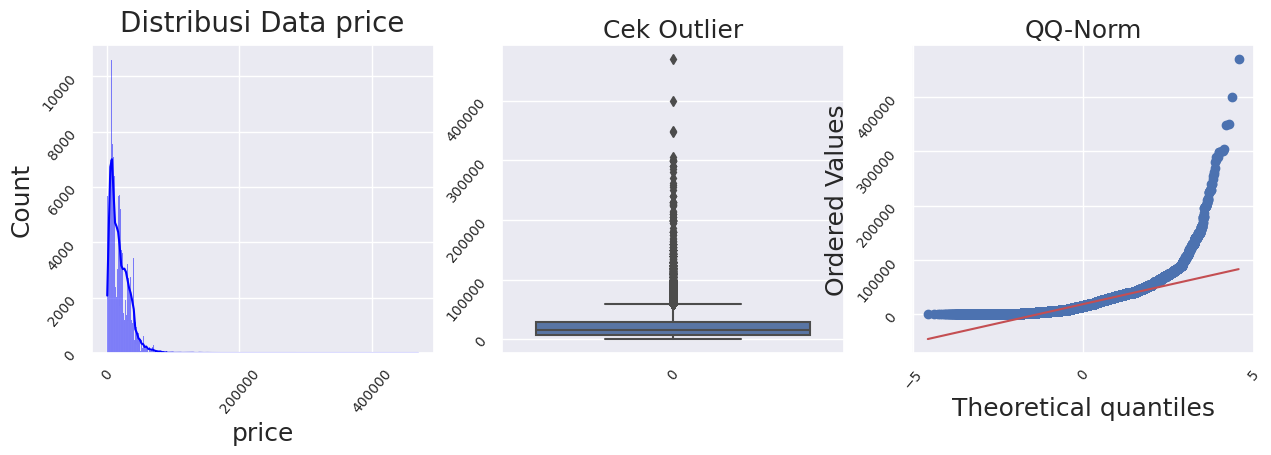

In [12]:
# Applying log transformation
# traindata['price'] = np.log(traindata['price'])
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
sns.histplot(traindata['price'], color = 'blue', kde = True)
plt.xticks(rotation=50, fontsize=10)
plt.yticks(rotation=50, fontsize=10)
plt.title('Distribusi Data price', size = 20, pad = 10)

plt.subplot(1,3,2)
sns.boxplot(traindata['price'])
plt.xticks(rotation=50, fontsize=10)
plt.yticks(rotation=50, fontsize=10)
plt.title('Cek Outlier')

plt.subplot(1,3,3)
stats.probplot(traindata['price'], plot = sns.mpl.pyplot)
plt.xticks(rotation=50, fontsize=10)
plt.yticks(rotation=50, fontsize=10)
plt.title("QQ-Norm")
plt.show()

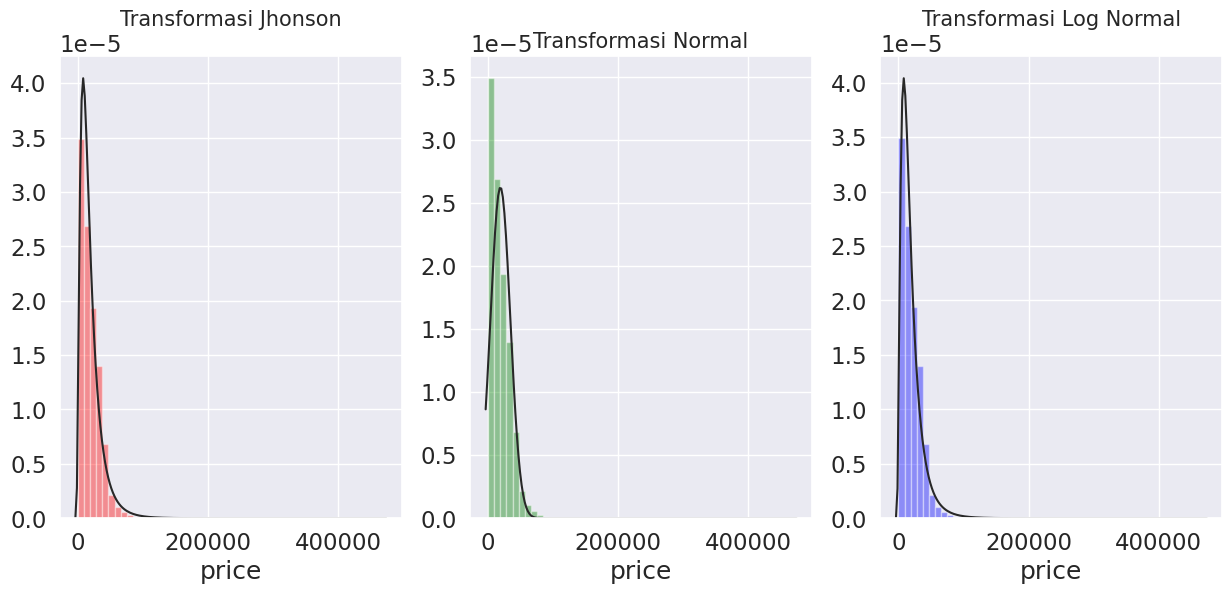

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.distplot(traindata['price'],kde=False, fit=stats.johnsonsu,color="red")
plt.title("Transformasi Jhonson", fontsize=15)
plt.subplot(1,3,2)
sns.distplot(traindata['price'], kde = False, fit = stats.norm, color = 'green')
plt.title("Transformasi Normal", fontsize=15)
plt.subplot(1,3,3)
sns.distplot(traindata['price'], kde = False, fit = stats.lognorm, color = 'blue')
plt.title("Transformasi Log Normal", fontsize=15)
plt.show()

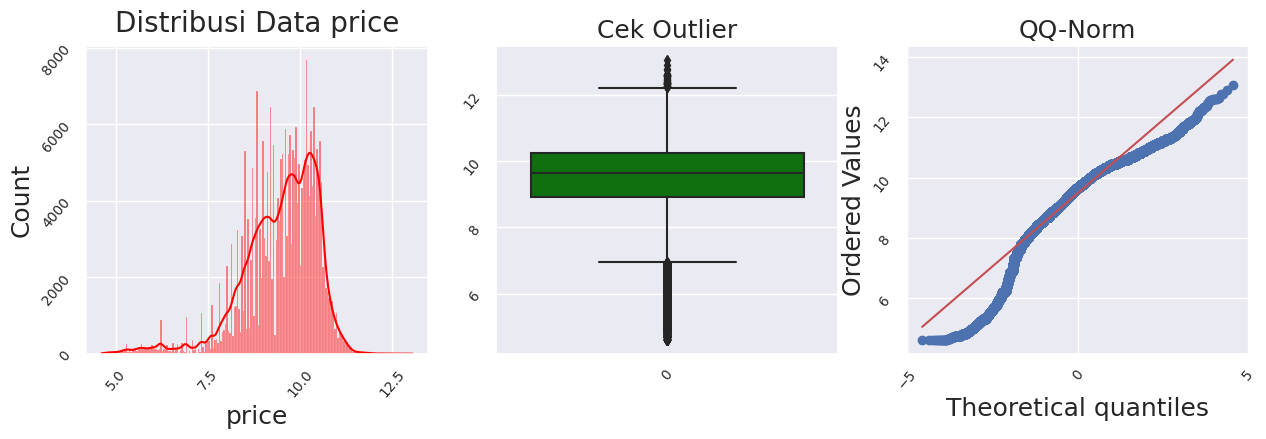

In [14]:
# Applying log transformation
traindata['price']= np.log(traindata['price'])
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
sns.histplot(traindata['price'], color='red', kde=True)
plt.xticks(rotation=50, fontsize=10)
plt.yticks(rotation=50, fontsize=10)
plt.title('Distribusi Data price', size = 20, pad = 10)

plt.subplot(1,3,2)
sns.boxplot(traindata['price'], color='green')
plt.xticks(rotation=50, fontsize=10)
plt.yticks(rotation=50, fontsize=10)
plt.title('Cek Outlier')

plt.subplot(1,3,3)
stats.probplot(traindata['price'], plot = sns.mpl.pyplot)
plt.xticks(rotation=50, fontsize=10)
plt.yticks(rotation=50, fontsize=10)
plt.title("QQ-Norm")
plt.show()

## Predictor

In [15]:
def CekNull(df):
  null=[]
  pctg=[]
  cols=[]
  dtyp=[]
  for col in df.columns:
    null.append(df[col].isna().sum())
    pctg.append(df[col].isna().sum()/len(df)*100)
    cols.append(col)
    dtyp.append(df[col].dtypes)
  Null_df = pd.DataFrame({'Columns':cols,"Null":null,'%Null':pctg,'Type':dtyp})
  return Null_df[Null_df['Null']>0].sort_values(by='Null',ascending=False).reset_index(drop=True)

CekNull(traindata)

,Columns,Null,%Null,Type
0,size,191805,71.947560,object
1,cylinders,107350,40.267827,object
2,condition,100464,37.684834,object
3,drive,80848,30.326719,object
4,paint_color,77962,29.244158,object
5,type,57085,21.413031,object
6,manufacturer,10189,3.821974,object
7,title_status,4957,1.859410,object
8,lat,2353,0.882629,float64
9,long,2353,0.882629,float64


In [16]:
CekNull(testdata)

,Columns,Null,%Null,Type
0,size,89104,71.660997,object
1,cylinders,51371,41.314611,object
2,condition,49819,40.066430,object
3,drive,37772,30.377752,object
4,paint_color,37567,30.212882,object
5,type,26819,21.568911,object
6,manufacturer,4853,3.902976,object
7,title_status,2209,1.776566,object
8,lat,1961,1.577115,float64
9,long,1961,1.577115,float64


In [17]:
# saya pikir ini variable yang kurang mempengaruhi harga
traindata.drop(columns=['Unnamed: 0','id','lat','long','size','paint_color','state','posting_date','fuel'], axis=1, inplace=True)
test_id = testdata['id']
testdata.drop(columns=['Unnamed: 0','id','lat','long','size','paint_color','state','posting_date','fuel'], axis=1, inplace=True)

In [18]:
cat = []
num = []
for col in traindata.columns:
  if traindata[col].dtypes==object:
    cat.append(col)
  else:
    num.append(col)

In [19]:
cat_non_null = cat.copy()
for col in CekNull(traindata)['Columns']:
  cat_non_null.remove(col)

print('nmeric => ',num,'\n')
print('categorical => ',cat,'\n')
print('catNull => ',list(CekNull(traindata)['Columns']),'\n')
print('cat_NonNull => ',cat_non_null,'\n')

nmeric =>  ['year', 'odometer', 'price'] 

categorical =>  ['manufacturer', 'model', 'condition', 'cylinders', 'title_status', 'transmission', 'drive', 'type'] 

catNull =>  ['cylinders', 'condition', 'drive', 'type', 'manufacturer', 'title_status'] 

cat_NonNull =>  ['model', 'transmission'] 



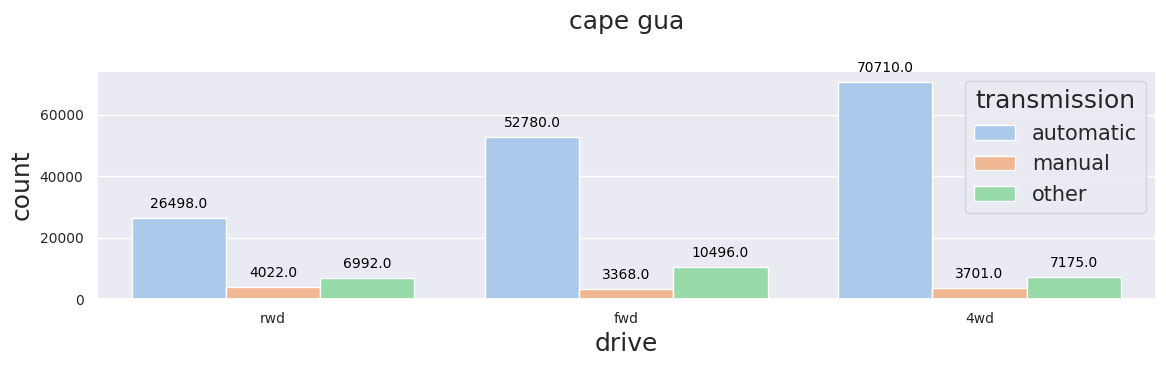

(None, None)

In [20]:
reg = traindata.groupby('drive')['transmission'].value_counts()
sns.set_palette('pastel')
plt.figure(figsize = (12,4))
ax = sns.countplot(data = traindata, x = 'drive', hue = 'transmission')
for p in ax.patches:
                    # Valuenya                          # Posisi
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.legend(loc = 'upper right', fontsize = 15, title = 'transmission')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('cape gua', pad = 30)
plt.tight_layout(), plt.show()

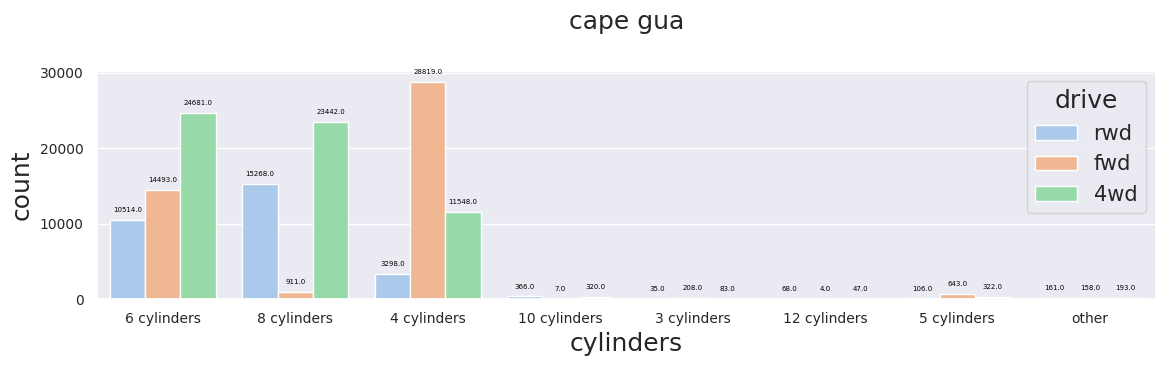

(None, None)

In [21]:
reg = traindata.groupby('cylinders')['drive'].value_counts()
sns.set_palette('pastel')
plt.figure(figsize = (12,4))
ax = sns.countplot(data = traindata, x = 'cylinders', hue = 'drive')
for p in ax.patches:
                    # Valuenya                          # Posisi
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=5, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.legend(loc = 'upper right', fontsize = 15, title = 'drive')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('cape gua', pad = 30)
plt.tight_layout(), plt.show()

## Fill Mssing Value

In [22]:
CekNull(traindata)

,Columns,Null,%Null,Type
0,cylinders,107350,40.267827,object
1,condition,100464,37.684834,object
2,drive,80848,30.326719,object
3,type,57085,21.413031,object
4,manufacturer,10189,3.821974,object
5,title_status,4957,1.859410,object


In [23]:
traindata[traindata.condition=='new'].head()

,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,price
523,2021.0,cadillac,escalade,new,NaN,10.0,clean,automatic,NaN,NaN,7.046647
561,2021.0,ford,explorer xlt 4x4,new,4 cylinders,94.0,clean,automatic,4wd,SUV,10.611597
889,2014.0,bmw,7 series 740li,new,NaN,81000.0,clean,automatic,NaN,NaN,10.038892
1683,1998.0,ram,3500 4x4,new,10 cylinders,93000.0,clean,manual,4wd,truck,9.680344
2186,2013.0,dodge,dart rally,new,4 cylinders,101992.0,clean,manual,fwd,NaN,8.698681


In [24]:
avg_odometers_by_condition = traindata.groupby('condition')['odometer'].mean()
median_odometers_by_condition = traindata.groupby('condition')['odometer'].median()
(median_odometers_by_condition - 75000).abs().idxmin()


'like new'

In [25]:
avg_odometers_by_condition['like new']*0.7 <= 75000

True

In [26]:
# Condition
avg_odometers_by_condition = traindata.groupby('condition')['odometer'].mean()
median_odometers_by_condition = traindata.groupby('condition')['odometer'].median()
def fill_condition_based_on_odometer(df):
    # Fill NaN values in 'condition' column based on odometer ranges
    for index, row in df.iterrows():
        if pd.isna(row['condition']):
            odometer = row['odometer']

            # Find the condition with the closest median odometer to the car's odometer
            closest_condition = (median_odometers_by_condition - odometer).abs().idxmin()

            # If the car's odometer is within 20% of the average odometer of the closest condition, assign the condition
            if 0.7 * avg_odometers_by_condition[closest_condition] <= odometer <= 1.3 * avg_odometers_by_condition[closest_condition]:
              df.at[index, 'condition'] = closest_condition
            else:
              df.at[index, 'condition'] = (avg_odometers_by_condition - avg_odometers_by_condition[closest_condition]*0.7).abs().idxmin()

    return df

traindata = fill_condition_based_on_odometer(traindata)
testdata = fill_condition_based_on_odometer(testdata)

In [27]:
traindata['cylinders'].ffill(inplace=True)
traindata['drive'].ffill(inplace=True)
traindata['type'].ffill(inplace=True)
traindata['manufacturer'].ffill(inplace=True)
traindata['title_status'].ffill(inplace=True)

testdata['cylinders'].ffill(inplace=True)
testdata['drive'].ffill(inplace=True)
testdata['type'].ffill(inplace=True)
testdata['manufacturer'].ffill(inplace=True)
testdata['title_status'].ffill(inplace=True)

CekNull(traindata)

,Columns,Null,%Null,Type
0,cylinders,3,0.001125,object


In [28]:
traindata['cylinders'].fillna('good', inplace=True)
CekNull(testdata)

,Columns,Null,%Null,Type


In [29]:
traindata.sample(7)

,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,price
107449,2016.0,chevrolet,cruze limited 1lt auto,good,4 cylinders,83969.0,clean,automatic,rwd,sedan,9.305196
57415,2017.0,ram,1500 sport 4x4 1/2 ton,like new,6 cylinders,64641.0,clean,automatic,4wd,truck,10.596610
31335,2017.0,mitsubishi,mirage,good,3 cylinders,120469.0,clean,automatic,fwd,hatchback,9.104424
91925,2018.0,ford,f-150,good,6 cylinders,60737.0,clean,automatic,rwd,pickup,10.341678
17646,2016.0,lincoln,navigator 4wd luxury,excellent,6 cylinders,102000.0,clean,automatic,4wd,SUV,10.308786
12317,2014.0,honda,cr-v ex,excellent,4 cylinders,66700.0,clean,automatic,4wd,SUV,9.735069
151772,1997.0,chevrolet,camaro z28,excellent,8 cylinders,88188.0,clean,automatic,rwd,hatchback,9.487972


In [30]:
traindata.drop(columns = ['type'],inplace=True)
testdata.drop(columns = ['type'],inplace=True)
label1 = LabelEncoder()
label1.fit(traindata['manufacturer'])
label2 = LabelEncoder()
label2.fit(traindata['model'])
label3 = LabelEncoder()
label3.fit(traindata['cylinders'])
label4 = LabelEncoder()
label4.fit(traindata['title_status'])
label6 = LabelEncoder()
label6.fit(traindata['drive'])
label7 = LabelEncoder()
label7.fit(traindata['condition'])

traindata['manufacturer'] = label1.transform(traindata['manufacturer'])
traindata['model'] = label2.transform(traindata['model'])
traindata['cylinders'] = label3.transform(traindata['cylinders'])
traindata['title_status'] = label4.transform(traindata['title_status'])
traindata['drive'] = label6.transform(traindata['drive'])
traindata['condition'] = label7.transform(traindata['condition'])
transmission = pd.get_dummies(traindata['transmission'])
traindata.drop(columns = ['transmission'], inplace=True)

testdata['manufacturer'] = label1.transform(testdata['manufacturer'])
label22 = LabelEncoder()
label22.fit(testdata['model'])
testdata['model'] = label22.transform(testdata['model'])
testdata['cylinders'] = label3.transform(testdata['cylinders'])
testdata['title_status'] = label4.transform(testdata['title_status'])
testdata['drive'] = label6.transform(testdata['drive'])
testdata['condition'] = label7.transform(testdata['condition'])
test_transmission = pd.get_dummies(testdata['transmission'])
testdata.drop(columns = ['transmission'], inplace=True)

traindataFix = pd.concat([traindata, transmission], axis=1)
testdataFix = pd.concat([testdata, test_transmission], axis=1)
traindataFix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266590 entries, 0 to 290128
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          266590 non-null  float64
 1   manufacturer  266590 non-null  int64  
 2   model         266590 non-null  int64  
 3   condition     266590 non-null  int64  
 4   cylinders     266590 non-null  int64  
 5   odometer      266590 non-null  float64
 6   title_status  266590 non-null  int64  
 7   drive         266590 non-null  int64  
 8   price         266590 non-null  float64
 9   automatic     266590 non-null  uint8  
 10  manual        266590 non-null  uint8  
 11  other         266590 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 29.2 MB


<function matplotlib.pyplot.show(close=None, block=None)>

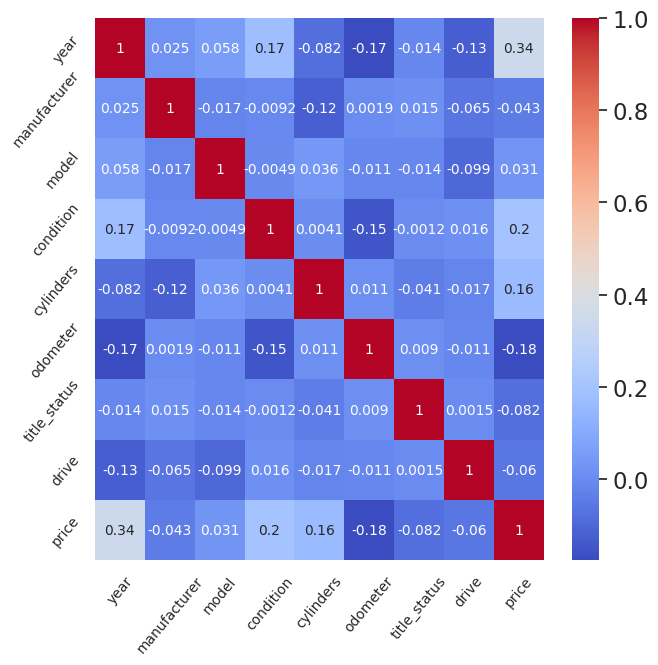

In [31]:
plt.figure(figsize=(7,7))
sns.heatmap(traindata.corr(), annot=True, cmap='coolwarm', annot_kws={'size':10})
plt.xticks(rotation=50, fontsize=10)
plt.yticks(rotation=50, fontsize=10)
plt.tight_layout()
plt.show

In [32]:
def calculate_VIF(df, cols):
    vif, tolerance = {}, {}
    for col in cols:
        # extract all the other cols you will regress against
        X = [f for f in cols if f != col]
        X, y = df[X], df[col]        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)

        tolerance[col] = 1 - r2        # calculate tolerance
        vif[col] = 1/(tolerance[col])    # calculate VIF
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance}) # return VIF DataFrame

calculate_VIF(traindataFix, traindataFix.columns)

,VIF,Tolerance
year,1.337910,0.747434
manufacturer,1.023747,0.976804
model,1.014621,0.985590
condition,1.074325,0.930817
cylinders,1.078475,0.927235
odometer,1.066289,0.937832
title_status,1.010512,0.989597
drive,1.049751,0.952607
price,1.281134,0.780559
automatic,inf,0.000000


# Build Model and Evalution

In [33]:
X = traindataFix.drop(columns = ['price'])
y = traindataFix.price
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=77)
print(x_train.shape)
print(y_train.shape)

(213272, 11)
(213272,)


In [34]:
r2_value = []
adjusted_r2_value = []
mae_value = []
mse_value = []
rmse_value = []

def model_evaluation(algorithm):
    model = algorithm.fit(x_train, y_train)
    y_train_pred= model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #Metrics Calculation.
    mae = mean_absolute_error(y_test,y_test_pred)
    mse = mean_squared_error(y_test,y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_test_pred)
    adjusted_r2 = 1 - ((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    r2_value.append(r2)
    adjusted_r2_value.append(adjusted_r2)

    print(f"R2 Score of the {model} model is=>",r2)
    print(f"Adjusted R2 Score of the {model} model is=>",adjusted_r2)
    print()
    print(f"MAE of {model} model is=>",mae)
    print(f"MSE of {model} model is=>",mse)
    print(f"RMSE of {model} model is=>",rmse)

    # Scatter plot.
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.scatter(y_train, y_train_pred, color='blue', label='Train')
    plt.scatter(y_test, y_test_pred, color='red', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot',fontweight="black",size=20,pad=10)

    # Residual plot.
    plt.subplot(1,2,2)
    plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', label='Train')
    plt.scatter(y_test_pred, y_test_pred - y_test, color='red', label='Test')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.title('Residual Plot',fontweight="black",size=20,pad=10)
    plt.show()

R2 Score of the LinearRegression() model is=> 0.21570813031236657
Adjusted R2 Score of the LinearRegression() model is=> 0.21554628716963287

MAE of LinearRegression() model is=> 0.6097825518964141
MSE of LinearRegression() model is=> 0.8070085093820347
RMSE of LinearRegression() model is=> 0.8983365234599084


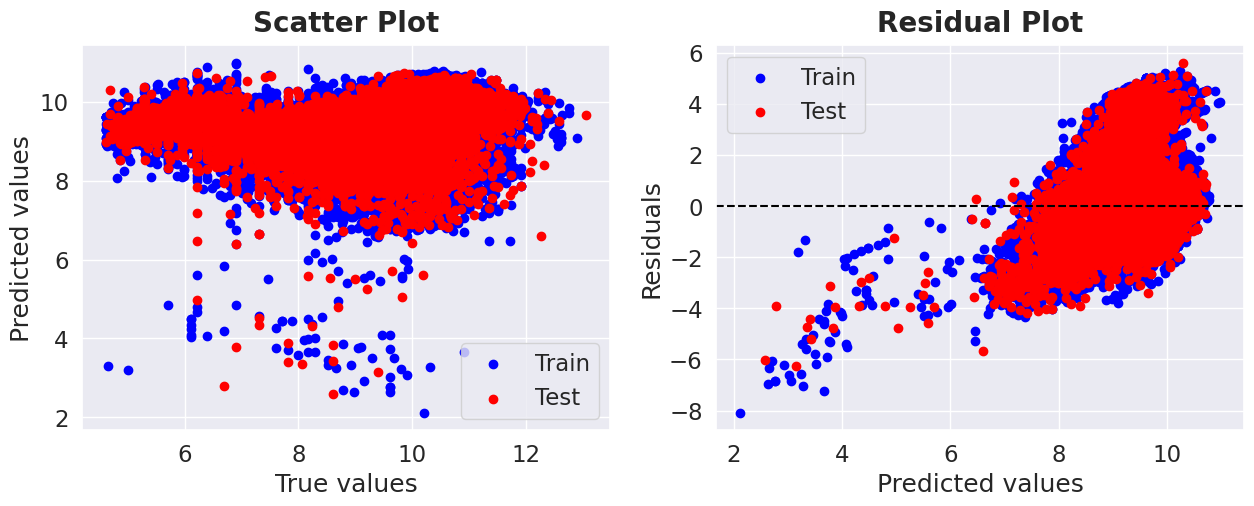

In [ ]:
model_evaluation(LinearRegression())

R2 Score of the GradientBoostingRegressor() model is=> 0.4738465714284399
Adjusted R2 Score of the GradientBoostingRegressor() model is=> 0.47373799663921756

MAE of GradientBoostingRegressor() model is=> 0.42151563740889497
MSE of GradientBoostingRegressor() model is=> 0.5413932115181747
RMSE of GradientBoostingRegressor() model is=> 0.7357942725505375


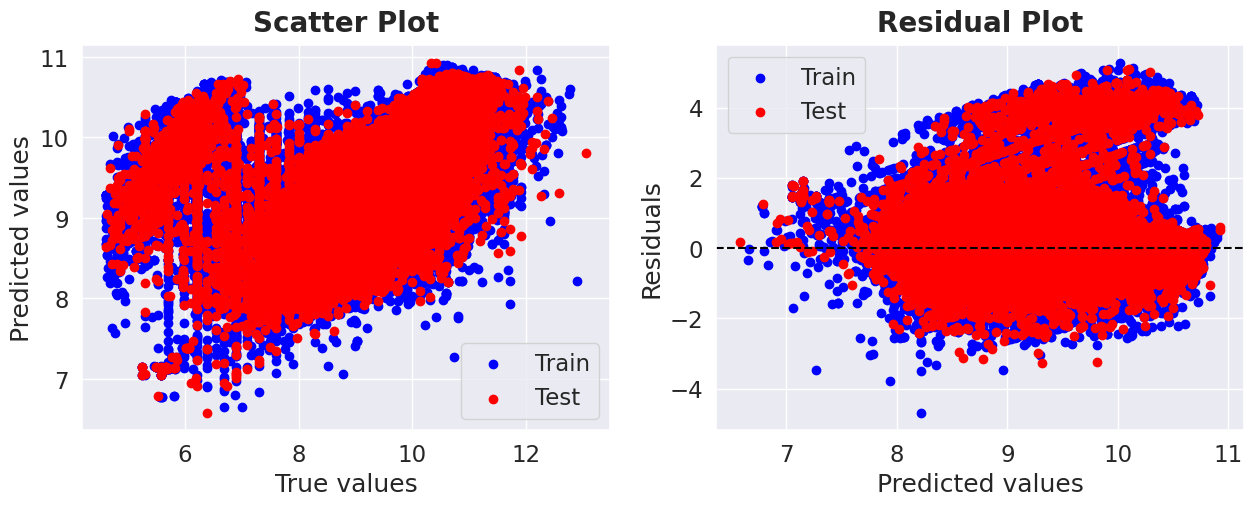

In [ ]:
model_evaluation(GradientBoostingRegressor())

R2 Score of the RandomForestRegressor() model is=> 0.6513584721796211
Adjusted R2 Score of the RandomForestRegressor() model is=> 0.6512865279931126

MAE of RandomForestRegressor() model is=> 0.2832051126609301
MSE of RandomForestRegressor() model is=> 0.35873976328105694
RMSE of RandomForestRegressor() model is=> 0.5989488820267194


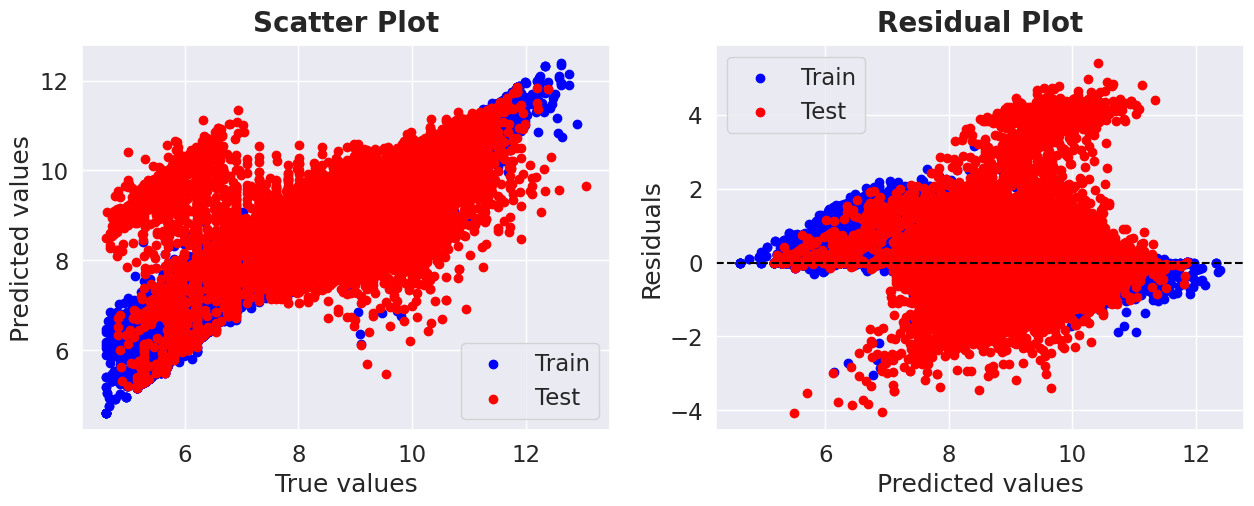

In [ ]:
model_evaluation(RandomForestRegressor())

R2 Score of the AdaBoostRegressor() model is=> -1.091918773738624
Adjusted R2 Score of the AdaBoostRegressor() model is=> -1.0923504532214428

MAE of AdaBoostRegressor() model is=> 1.3323999866946612
MSE of AdaBoostRegressor() model is=> 2.1525102026309075
RMSE of AdaBoostRegressor() model is=> 1.4671435521553122


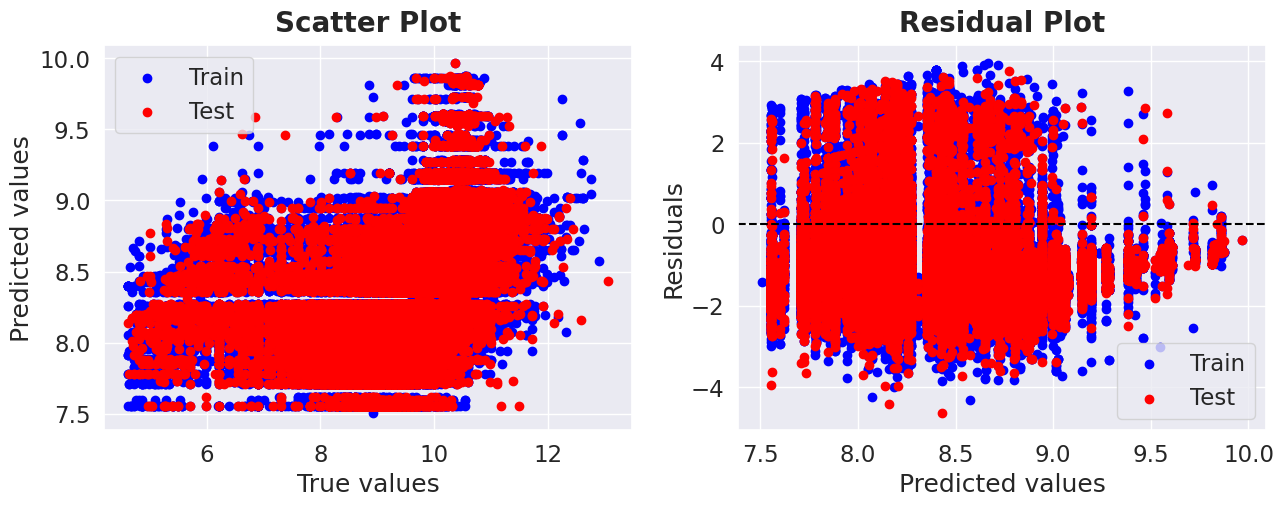

In [ ]:
model_evaluation(AdaBoostRegressor())

R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model is=> 0.5881014441865551
Adjusted R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stoppin

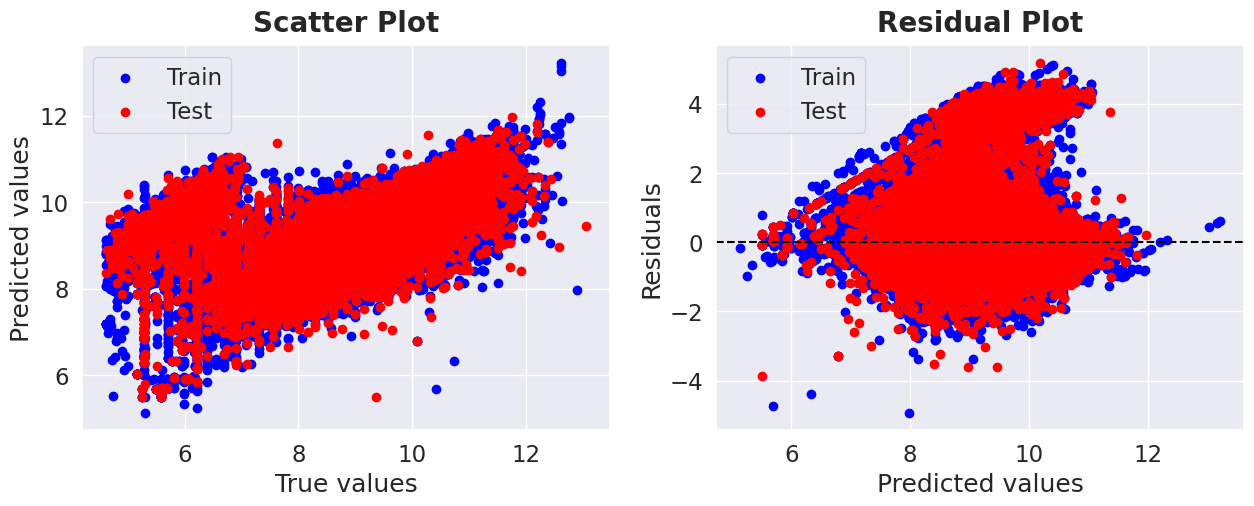

In [ ]:
model_evaluation(XGBRegressor())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 213272, number of used features: 11
[LightGBM] [Info] Start training from score 9.478004
R2 Score of the LGBMRegressor() model is=> 0.5467814553697881
Adjusted R2 Score of the LGBMRegressor() model is=> 0.5466879311137769

MAE of LGBMRegressor() model is=> 0.3704443629127986
MSE of LGBMRegressor() model is=> 0.4663458034723646
RMSE of LGBMRegressor() model is=> 0.6828951628708206


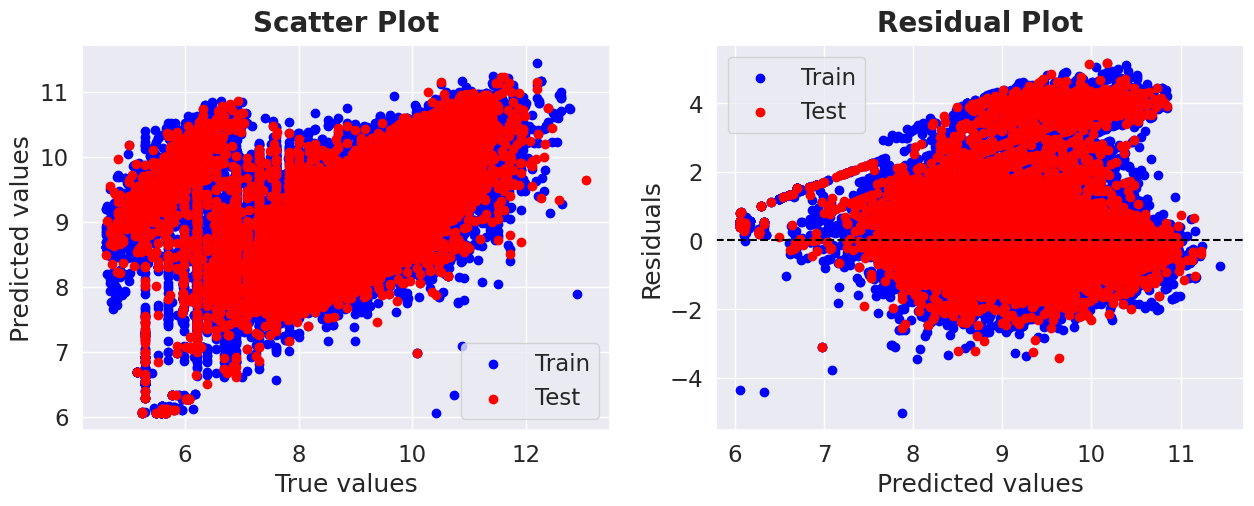

In [ ]:
model_evaluation(LGBMRegressor())

Learning rate set to 0.095532
0:	learn: 0.9766139	total: 107ms	remaining: 1m 47s
1:	learn: 0.9492843	total: 178ms	remaining: 1m 29s
2:	learn: 0.9248985	total: 251ms	remaining: 1m 23s
3:	learn: 0.9046746	total: 324ms	remaining: 1m 20s
4:	learn: 0.8872222	total: 394ms	remaining: 1m 18s
5:	learn: 0.8717911	total: 466ms	remaining: 1m 17s
6:	learn: 0.8589427	total: 536ms	remaining: 1m 15s
7:	learn: 0.8482826	total: 590ms	remaining: 1m 13s
8:	learn: 0.8386395	total: 663ms	remaining: 1m 13s
9:	learn: 0.8305116	total: 722ms	remaining: 1m 11s
10:	learn: 0.8235486	total: 787ms	remaining: 1m 10s
11:	learn: 0.8175374	total: 860ms	remaining: 1m 10s
12:	learn: 0.8114154	total: 927ms	remaining: 1m 10s
13:	learn: 0.8059721	total: 968ms	remaining: 1m 8s
14:	learn: 0.8016521	total: 1.03s	remaining: 1m 7s
15:	learn: 0.7975418	total: 1.09s	remaining: 1m 7s
16:	learn: 0.7937830	total: 1.16s	remaining: 1m 7s
17:	learn: 0.7895489	total: 1.21s	remaining: 1m 5s
18:	learn: 0.7868010	total: 1.27s	remaining: 1m 5

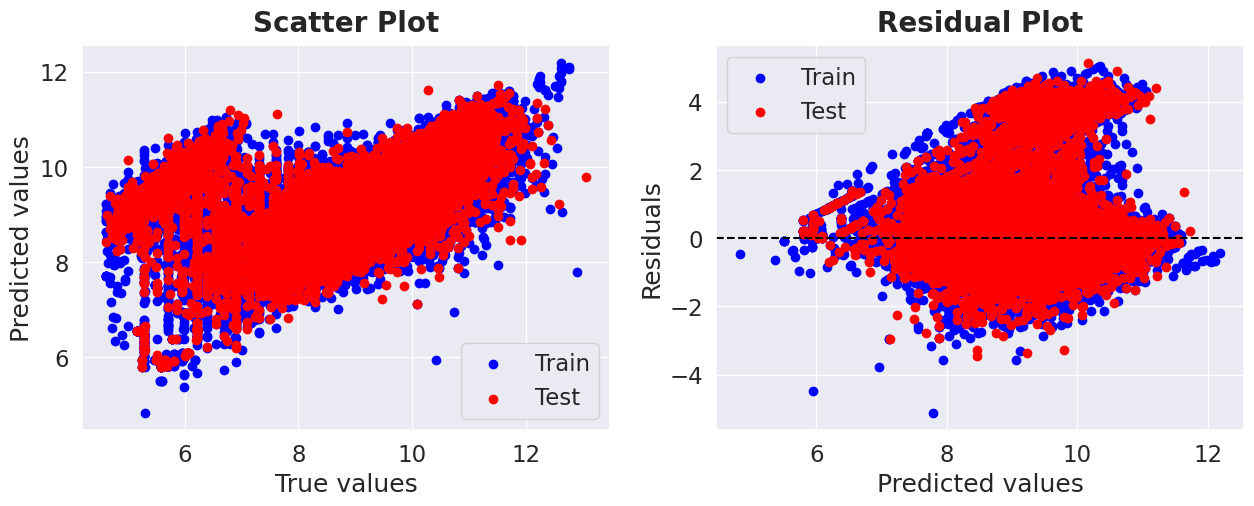

In [ ]:
model_evaluation(CatBoostRegressor())

In [ ]:
algorit = ['LR','GradBoost','RF','AdaBoost','XGB','LGBM','CatBoost']
pd.DataFrame({'Model':algorit,'R2':r2_value,'Adj_R2':adjusted_r2_value,'MAE':mae_value,'MSE':mse_value,
              'RMSE':rmse_value}).sort_values(by='R2', ascending=False).reset_index(drop=True)

,Model,R2,Adj_R2,MAE,MSE,RMSE
0,RF,0.651358,0.651287,0.283205,0.358740,0.598949
1,XGB,0.588101,0.588016,0.336702,0.423829,0.651022
2,CatBoost,0.585182,0.585096,0.337815,0.426833,0.653325
3,LGBM,0.546781,0.546688,0.370444,0.466346,0.682895
4,GradBoost,0.473847,0.473738,0.421516,0.541393,0.735794
5,LR,0.215708,0.215546,0.609783,0.807009,0.898337
6,AdaBoost,-1.091919,-1.092350,1.332400,2.152510,1.467144


## Hyperparameter Tune

### RandomForest

In [ ]:
param_grid1 = {
    'n_estimators': [90, 100, 110],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
RF_gb = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid1, cv = 5, n_jobs=-1)
RF_gb.fit(x_train, y_train)
best_parameters1 = RF_gb.best_params_
best_parameters1

In [ ]:
model_evaluation(RandomForestRegressor(**best_parameters1))

### XGB

In [ ]:
param_grid2 = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.09, 0.1, 0.3],
    'max_depth': [3, 5, 7],
}
XGB_gb = GridSearchCV(estimator = XGBRegressor(), param_grid = param_grid2, cv = 5, n_jobs=-1)
XGB_gb.fit(x_train, y_train)
best_parameters2 = XGB_gb.best_params_
best_parameters2

In [ ]:
model_evaluation(XGBRegressor(**best_parameters2))

### CatBoost

In [ ]:
param_grid3 = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.12, 0.13, 0.14],
    'depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
CB_gb = GridSearchCV(estimator = CatBoostRegressor(), param_grid = param_grid2, cv = 5, n_jobs=-1)
CB_gb.fit(x_train, y_train)
best_parameters3 = CB_gb.best_params_
best_parameters3

In [ ]:
model_evaluation(CatBoostRegressor(**best_parameters3))

## Stacking

In [ ]:
RF_model = RandomForestRegressor(**best_parameters1)
XGB_model = XGBRegressor(**best_parameters2)
CatBoost_model = CatBoostRegressor(**best_parameters3)
stack_model = StackingCVRegressor(regressors=(RF_model, XGB_model, CatBoost_model),
                                  meta_regressor = RF_model,
                                  use_features_in_secondary=True)
stack_model.fit(x_train, y_train)

In [ ]:
import joblib
joblib.dump(stack_model, 'UsedCarPrice.pkl')
from google.colab import files
files.download('UsedCarPrice.pkl')

# Submission

In [ ]:
prediction = stack_model.predict(testdata)
output_df = test_id.to_frame()
output_df["price"] = prediction
output_df["price"] = np.exp(output_df["price"])
output_df.to_csv('submission.csv',index=False, quoting=2)
files.download('submission.csv')

## i just tried making a model with randomforest

In [35]:
model = RandomForestRegressor(n_estimators=110)
model.fit(x_train,y_train)
prediction = model.predict(testdataFix)
output_df = test_id.to_frame()
output_df["price"] = prediction
output_df["price"] = np.exp(output_df["price"])
output_df.to_csv('submission.csv',index=False, quoting=2)

import joblib
joblib.dump(model, 'UsedCarPriceRF.pkl')
# from google.colab import files
# files.download('UsedCarPriceRF.pkl')
# files.download('submission.csv')

import shutil
from google.colab import drive
drive.mount('/content/drive')
!cd '/content/drive/MyDrive/Competition & Project/Kaggle-UsedCar_Predicting'
fileModel = '/content/UsedCarPriceRF.pkl'
fileSubmi = '/content/submission.csv'
folder = '/content/drive/MyDrive/Competition & Project/Kaggle-UsedCar_Predicting'

shutil.copy(fileModel, folder)
shutil.copy(fileSubmi, folder)


Mounted at /content/drive


'/content/drive/MyDrive/Competition & Project/Kaggle-UsedCar_Predicting/submission.csv'

In [41]:
model.predict([[2021, 18, 14999,0,7,67453,0,2,0,1,0]])

array([8.31019583])